In [1]:
import torch
from torch import nn
from torch.nn import functional as F

from deep_mlda import DeepMLDA

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# MNISTデータセットのダウンロードとDataLoaderの設定
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# バッチサイズを設定
batch_size = 64

# DataLoaderの作成
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
mlda = DeepMLDA(28*28, 10, 200, 10)

In [4]:
mlda.train(train_loader)

epoch:1, loss:11546.524311924693
epoch:2, loss:7334.417444512073
epoch:3, loss:6547.772834834828
epoch:4, loss:6236.587130323673
epoch:5, loss:6044.004260605657
epoch:6, loss:5904.625109954476
epoch:7, loss:5797.486828391809
epoch:8, loss:5713.946940451574
epoch:9, loss:5644.511551994397
epoch:10, loss:5585.697901380737
epoch:11, loss:5534.898211337713
epoch:12, loss:5490.558696930029
epoch:13, loss:5451.944159801895
epoch:14, loss:5416.598003310099
epoch:15, loss:5385.221908976454
epoch:16, loss:5356.846562437467
epoch:17, loss:5330.914428059548
epoch:18, loss:5306.965863304179
epoch:19, loss:5284.502153752835
epoch:20, loss:5264.300761447772
epoch:21, loss:5244.654252580543
epoch:22, loss:5227.003731156617
epoch:23, loss:5210.51255044357
epoch:24, loss:5196.298847666672
epoch:25, loss:5180.012105414555
epoch:26, loss:5166.082360592316
epoch:27, loss:5154.991470711463
epoch:28, loss:5141.755599340481
epoch:29, loss:5129.604542214181
epoch:30, loss:5119.159463172025


In [5]:
from sklearn.manifold import TSNE
import numpy as np

In [6]:
test_loader = DataLoader(dataset=test_dataset, batch_size=60000, shuffle=False)

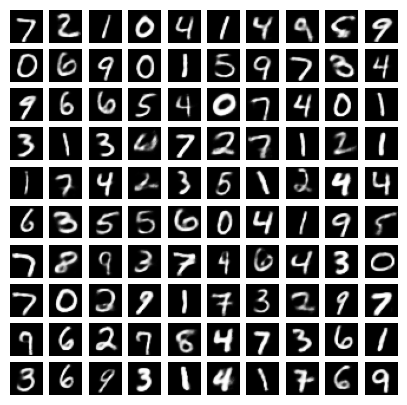

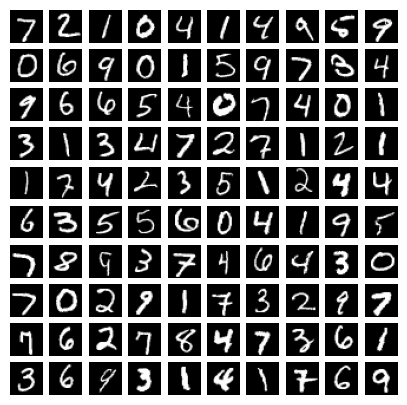

In [7]:
for t, (batch_data, label) in enumerate(test_loader):
    x = batch_data.view(batch_data.size(0), 28*28).to("cuda")
    w = mlda.word_to_bow(label).to("cuda")
    mu, logvar, z, theta, xh, wh = mlda.xw_to_z_to_xhwh(x, w)
    
    plt.figure(figsize=(5, 5))
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(xh[i].view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='gray')
        plt.axis('off')
    plt.savefig(f'./figs/xh_pred.png')
    plt.show()

    plt.figure(figsize=(5, 5))
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(x[i].view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='gray')
        plt.axis('off')
    plt.savefig(f'./figs/xh_true.png')
    plt.show()
    
    if t == 0:
        break

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(z.detach().cpu().numpy()))

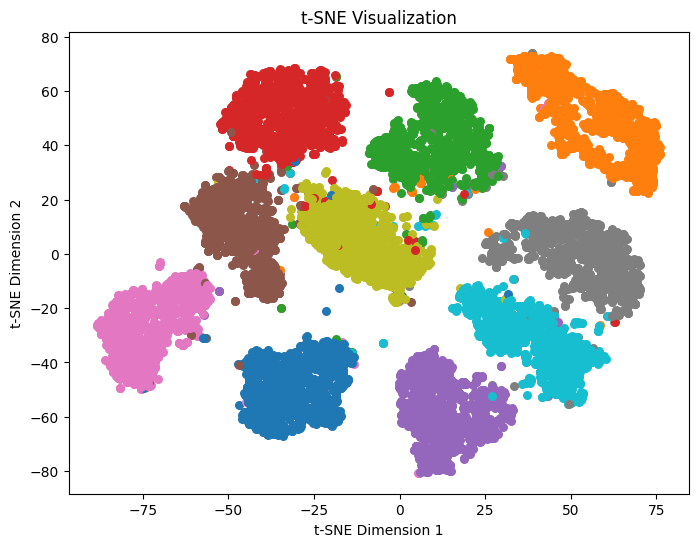

In [9]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),   # 青
    (1.0, 0.4980392156862745, 0.054901960784313725),                 # オレンジ
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # 緑
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),   # 赤
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),     # 紫
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # 茶
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),    # ピンク
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),    # グレー
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),   # イエロー
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)    # シアン
]

# プロット
plt.figure(figsize=(8, 6))
for i, (x,y) in enumerate(X_embedded):
    ci = colors[int(label[i])]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig('./figs/tSEN_z.png')
plt.show()